<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2025</p>
<p style="margin: 0; text-align:right;">Data Processes</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Evaluation of a binary classifier

Let's import the libraries

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Let's define the function to plot the confusion matrix

In [2]:
def plot_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots()
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Let's define two functions to plot ROC and PR curves

In [3]:
def plot_roc_curve(y_test, y_probs, ax=None):
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    if ax is None:
        ax = plt.gca()
    ax.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], "k--", label="Random Guess")
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.legend(loc="lower right")
    ax.set_title("ROC Curve")

In [4]:
def plot_pr_curve(y_test, y_probs, ax=None):
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    if ax is None:
        ax = plt.gca()
    ax.plot(recall, precision, label="PR Curve")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title("Precision-Recall Curve")
    ax.legend(loc="lower left")

The dataset we will use

In [5]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, random_state=42, class_sep=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let us train a model

In [6]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]

Metrics to compute

In [7]:
metrics_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

# df for visualization
metrics_df = pd.DataFrame(list(metrics_results.items()),
                          columns=['Metric', 'Value'])
metrics_df

,Metric,Value
0,Accuracy,0.840000
1,Precision,0.840909
2,Recall,0.804348
3,F1-Score,0.822222


Let's plot the confusion matrix

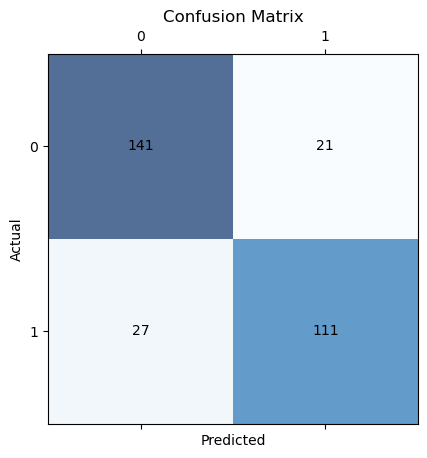

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix)

Let's generate the two plots: ROC and PR curves

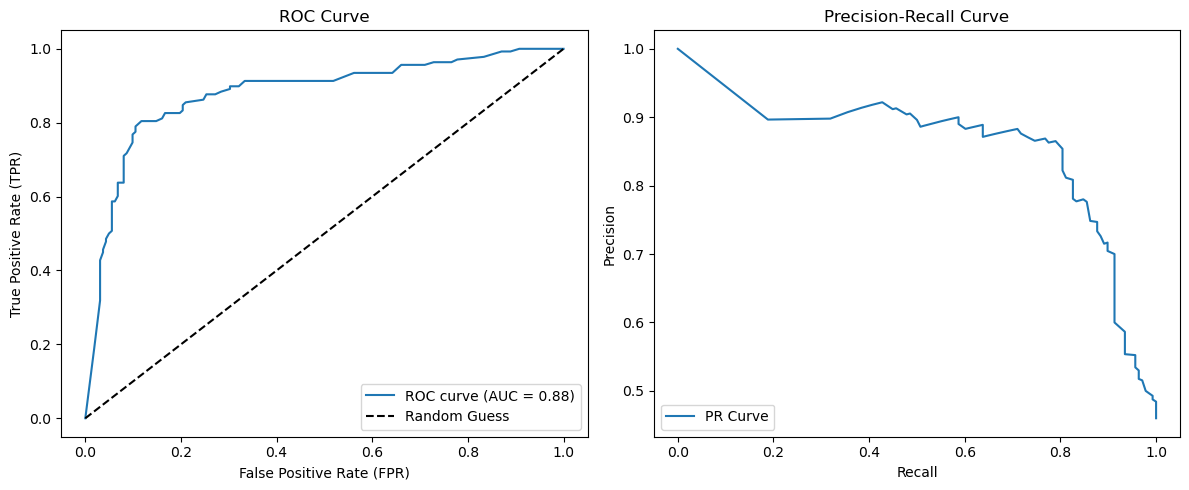

In [9]:
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plot_roc_curve(y_test, y_probs)

# PR Curve
plt.subplot(1, 2, 2)
plot_pr_curve(y_test, y_probs)

plt.tight_layout()
plt.show()